DevHack

In [1]:
import pandas as pd


In [2]:
#importing the Glass Identification Database
#as the dataset doesn't have any attribute name there header line is None

data = pd.read_csv('glass.data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.shape


(214, 11)

In [4]:
# summarize the class distribution
import collections

target = data.values[:,-1]
counter = collections.Counter(target)

for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=70, Percentage=32.710%
Class=2, Count=76, Percentage=35.514%
Class=3, Count=17, Percentage=7.944%
Class=5, Count=13, Percentage=6.075%
Class=6, Count=9, Percentage=4.206%
Class=7, Count=29, Percentage=13.551%


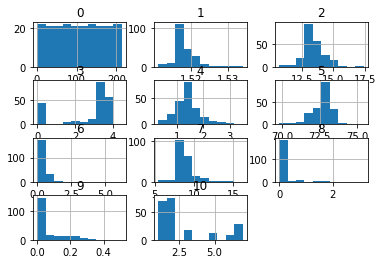

In [ ]:
from matplotlib import pyplot
# create a histogram plot of each variable
data.hist()
# show the plot
pyplot.show()

In [8]:
#converting the pandas dataframe  into a numpy array for slicing purpose
data= data.values
print(data)

[[  1.        1.52101  13.64    ...   0.        0.        1.     ]
 [  2.        1.51761  13.89    ...   0.        0.        1.     ]
 [  3.        1.51618  13.53    ...   0.        0.        1.     ]
 ...
 [212.        1.52065  14.36    ...   1.64      0.        7.     ]
 [213.        1.51651  14.38    ...   1.57      0.        7.     ]
 [214.        1.51711  14.23    ...   1.67      0.        7.     ]]


In [9]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]


NameError: ignored

In [13]:
# label encode the target variable to have the classes 0 and 1

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#Fit label encoder and return encoded labels

y = le.fit_transform(y)

print(X.shape, y.shape, collections.Counter(y))

(214, 10) (214,) Counter({1: 76, 0: 70, 5: 29, 2: 17, 3: 13, 4: 9})


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier

In [16]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [19]:
from numpy import mean
from numpy import std

# define the reference model
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.355 (0.009)


Achieving a score above about 35.5 percent indicates that a model has skill on this dataset, and a score at or below this value indicates that the model does not have skill on this dataset.

In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [22]:
# define models to test
def get_models():
	models, names = list(), list()
	# SVM
	models.append(SVC(gamma='auto'))
	names.append('SVM')
	# KNN
	models.append(KNeighborsClassifier())
	names.append('KNN')
	# Bagging
	models.append(BaggingClassifier(n_estimators=1000))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=1000))
	names.append('RF')
	# ET
	models.append(ExtraTreesClassifier(n_estimators=1000))
	names.append('ET')
	return models, names

In [26]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))


>SVM 0.973 (0.029)
>KNN 0.977 (0.023)
>BAG 0.981 (0.021)
>RF 0.975 (0.029)
>ET 0.980 (0.021)


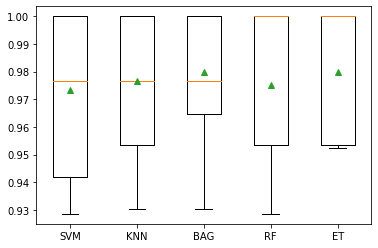

In [25]:
# plot the results

import matplotlib
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names, showmeans=True)
plt.show()